# Hyper-Parameter Tuning
All the machine learning models contain hyper-parameters than you can tune (as if they were knobs on a guitar) to change the form of your model. For instance, a [decision tree classifier][1] has many hyper-parameters, some of which are:

* **criterion** : Measures quality of the split - default is mean squared error, can also be mean absolute error
* **max_depth** : The maximum depth of the tree. Default is to continue making splits until node is pure
* **min_samples_split** : The minimum number of samples required to split an internal node - default is 2
* **min_samples_leaf** : The minimum number of samples required to be at a leaf node. Default is 1

[1]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

### Hyper Parameters vs Parameters
Hyper-parameters are all the knobs that you have control over. You set them during **instantiation**. Many of these models have "normal" parameters that are fit during **training**. These parameters are completely different than hyper-parameters. The algorithm will find the optimal value of these parameters based on the evaluation metric that is uses. For instance, in a linear regression, the normal parameters are the slope and intercept.

Hyper-parameters never change after you have instantiated your model. 

In a decision tree, a hyper-parameter such as **`max_depth`** dictates the maximum depth of the tree. The algorithm is allowed to use only these many levels. The location of where and how the splits take place is learned through the model and can be thought of as a normal parameter.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
pd.options.display.max_columns = 100
heart = pd.read_csv('data/heart.csv')
heart.head()

,slope,thal,rest_bp,chest_pain,num_major_vessels,sugar,rest_ekg,chol,oldpeak,sex,age,max_heart_rate,angina,disease
0,1,normal,128,2,0,0,2,308,0.0,male,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,female,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,male,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,male,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,male,59,145,0,0


In [21]:
heart.shape

(180, 14)

In [22]:
X = heart['max_heart_rate'].values
X = X.reshape(-1, 1)
y = heart['disease'].values

In [23]:
# import and instantiate
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()

In [24]:
dtr.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
dtr.score(X, y)

0.76111111111111107

## Make a prediction for every single possible integer heart rate
The **`arange`** function creates a single dimensional numpy array with start, stop, and step parameters. You must turn this into a 2-dimensional array. NumPy suggests the following syntax:

In [26]:
x = np.arange(X.min(), X.max())
x = x.reshape(-1, 1)
x[:5]

array([[ 96],
       [ 97],
       [ 98],
       [ 99],
       [100]])

In [27]:
y_pred = dtr.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Plot the original data along with the prediction
With linear regression, we had a parameterized model where we could easily plot a line from based on the intercept and slope. With a decision tree, there isn't such a simple mapping from input to output. You would have to traverse the tree to find the end node to get the output value. 

Thankfully, an easy solution to plotting the model exists and that is to simply plot the prediction for each value of x within the possible range of your data.

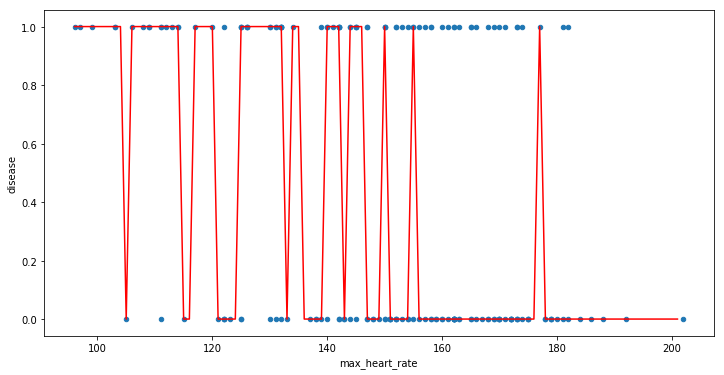

In [11]:
ax = heart.plot(kind='scatter', x='max_heart_rate', y='disease', figsize=(12, 6))
ax.plot(x, y_pred, color='red')

# Extreme Overfitting
We can clearly see that the model is memorizing the data. By default, the decision tree **`max_depth`** hyper-parameter is set to **`None`**, which the documentation says it continues to make new splits until all nodes are "pure". **Pure** meaning that all values are the same in each node. i.e. all the people have the same value for disease.

## The tree object
Scikit-learn returns the tree object to us as the **`tree_`** attribute. Let's assign it to its own variable and explore it.

In [28]:
tree = dtr.tree_

In [29]:
tree.n_features

1

In [30]:
tree.max_depth

13

In [31]:
tree.node_count

113

## Using Cross Validation to determine how well this model would work in the real world
Let's use the **`cross_val_score`** helper function to do cross validation.

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(dtr, X, y, cv=5)
scores

array([ 0.47222222,  0.52777778,  0.5       ,  0.41666667,  0.55555556])

In [34]:
scores.mean(), scores.std()

(0.49444444444444446, 0.047790695928014597)

## Wow, that was extremely bad
The R-squared dropped a lot.

# Exercise
Let's tune our decision tree to make it better. Create a new decision tree instance, but this time change the **`max_dept`** parameter and output the mean and standard deviation of your cross validation scores. Continue to tune this parameter until you believe you have found the best value for it.

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.multiclass import OutputCodeClassifier


In [89]:
kf = KFold(n_splits=5, shuffle=True)

In [90]:
dtc3 = DecisionTreeClassifier(max_depth=5, min_samples_split=25)

In [91]:
score = cross_val_score(dtc3, X, y, cv=kf)
score

array([ 0.52777778,  0.58333333,  0.58333333,  0.58333333,  0.66666667])

In [155]:
occ = OutputCodeClassifier(dtc3, code_size = .25, random_state=3, n_jobs=10)

In [157]:
y.shape

(1, 180)

In [160]:
y[:10]

array([[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0]])

In [161]:
y.shape

(1, 180)

In [165]:
y2 = y.reshape(-1,1)

In [166]:
y2.shape

(180, 1)

In [167]:
occ.fit(X,y2)

OutputCodeClassifier(code_size=0.25,
           estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
           n_jobs=10, random_state=3)

In [147]:
X.ndim

2

In [148]:
X.shape

(180, 1)

In [149]:
X[:10]

array([[170],
       [158],
       [162],
       [181],
       [145],
       [150],
       [157],
       [112],
       [140],
       [158]])

In [150]:
y.ndim

2

In [151]:
y[:10]

array([[0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0]])

In [152]:
y.shape

(1, 180)

In [153]:
y = y

In [168]:
occ.score(X,y2)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
score2 = cross_val_score(dtc3, X, y, cv=)
score2

# Exercise
Can you make a simple scatterplot of depth vs cross validation score. Use at least 20 depths?

## Tuning another hyper-parameter
It looks like a good choice for depth is somewhere between 2 and 5. Let's tune the **`min_samples_split`** parameter

In [96]:
depths = np.arange(1, 32)
splits = np.arange(2, 20)

all_scores = np.zeros((len(depths), len(splits)))
for i, depth in enumerate(depths):
    for j, split in enumerate(splits):
        dtr = DecisionTreeClassifier(max_depth=depth, min_samples_split=split)
        scores = cross_val_score(dtr, X, y)
        all_scores[i, j] = scores.mean()

## Use a heatmap to visualize combinations

In [97]:
import seaborn as sns

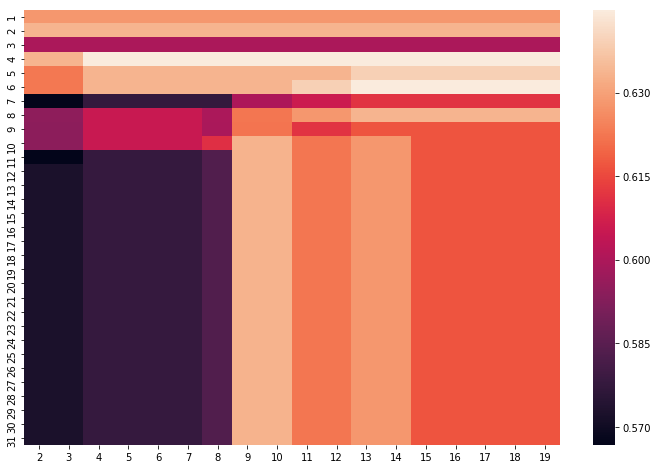

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(all_scores, ax=ax, xticklabels=splits, yticklabels=depths)

# This is tedious when trying to find optimal hyper-parameters
We could continue to nest our for loops for each new hyper-parameter, but that would quickly get out of control. Let's go ahead and save this as our 'final' model. 

In [100]:
dtr_final_manual = DecisionTreeClassifier(max_depth=3)

# Improvement over default
Remember, the default decision tree massively overfit the data and yielded an R2 of only .18.

# Let Scikit-Learn do this
There is a **meta-estimator** called **`GridSearchCV`** which is part of the **`model_selection`** module that will do an exhaustive search of your given hyper-parameter space, do cross validation, and find the best hyper-parameters.


### Meta-Estimator?
**`GridSearchCV`** is not a machine learning model, but it's usage is similar to all the other Scikit-Learn estimators, except with it, you must pass it the model you want to optimize.

In [101]:
# import
from sklearn.model_selection import GridSearchCV

## Use a dictionary to map hyper-parameter name to possible values
To use **`GridSearch`**, you must create a Python dictionary that uses hyper-parameter string names as the keys that map to a list/array of the possible values you want it to search. We can use the same values for depth and splits as we did above.

In [102]:
depths = np.arange(1, 32)
splits = np.arange(2, 20)

In [103]:
param_grid = {'max_depth': depths, 
              'min_samples_split': splits}

#creates a python dictionary 

In [108]:
dtr = DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True)

In [111]:
# instantiate
gs = GridSearchCV(dtr, param_grid=param_grid, cv=kf)

For each combination of depth and split, a decision tree will be fit and cross validated.

In [112]:
# fit
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
gs.best_params_

{'max_depth': 6, 'min_samples_split': 9}

In [114]:
gs.best_score_

0.60555555555555551

## Get results from our grid search object
Drill into the grid search object and find the best score and hyper-parameters.

### All results are stored in `cv_results_` attribute
The **`cv_results_`** is a dictionary containing a massive amount of result data from the grid search. It has data on the time it took to fit the model, time it took to score the model, the scores on each cross validated section, and more.

## Getting the best trained estimator back
You don't have to retrain the model after you know what the best parameters are. The **`GridSearchCV`** object provides you the best estimator with the **`best_estimator_`** attribute.

In [177]:
dtr_best_gs = gs.best_estimator_
dtr_best_gs

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## By default the best estimator has been trained on the full dataset
The best estimator that gets returned has been re-fit on ALL of the training data. So, after validation, and discovering which combination of parameters worked best. The entire dataset is used to train the model.

## Grid searching is computationally expensive. Search area can explode
Grid searching is doing a tremendous amount of work. First off, it searches all combinations of the hyper-parameter space that you supply it with. This alone can add up quickly. If you have 10 choices of values for each of 3 different hyper-parameters, the grid search would have to run 1,000 different models.

Additionally, the grid search is doing cross validation (that's why its name ends in **`CV`**). You can easily create several hours of work for your machine with a fairly simple grid search.

One idea to limit computation time is to limit your grid searching to a smaller subset of the hyper-parameters. Optimize them first and then run another grid search with those newly optimized hyper-parameters set. Here is an example where we set the max depth as a single combination in our parameter grid.

In [181]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [182]:
param_grid = {'max_depth': [3], 
              'min_samples_split': splits}

In [184]:
gs1 = GridSearchCV(dtr, param_grid=param_grid)
gs1.fit(X, y2)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3], 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [185]:
gs1.grid_scores_

[mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 2},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 3},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 4},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 5},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 6},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 7},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 8},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 9},
 mean: -0.00525, std: 0.03494, params: {'max_depth': 3, 'min_samples_split': 10},
 mean: 0.00042, std: 0.03426, params: {'max_depth': 3, 'min_samples_split': 11},
 mean: 0.00404, std: 0.03871, params: {'max_depth': 3, 'min_samples_split': 12},
 mean: 0.00404, std: 0.03871, params: {'max_depth': 3, 'min_samples_split': 13},
 mean: 0.00404, std: 0.0387

In [119]:
import warnings
warnings.filterwarnings ('ignore')

In [186]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000658,3.209329e-04,0.000432,2.234878e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
1,0.000343,2.411448e-05,0.000245,1.048066e-05,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
2,0.000354,4.975845e-05,0.000267,5.433818e-05,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
3,0.000338,3.160010e-05,0.000248,1.484182e-05,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
4,0.000570,1.712442e-04,0.000431,1.386821e-04,1,6,"{'max_depth': 1, 'min_samples_split': 6}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
5,0.000327,9.854045e-06,0.000253,2.461422e-05,1,7,"{'max_depth': 1, 'min_samples_split': 7}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
6,0.000437,1.452388e-04,0.000323,1.032261e-04,1,8,"{'max_depth': 1, 'min_samples_split': 8}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
7,0.000282,1.601023e-05,0.000226,3.648973e-06,1,9,"{'max_depth': 1, 'min_samples_split': 9}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
8,0.000269,1.549537e-06,0.000235,2.165208e-05,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
9,0.000286,3.154940e-05,0.000231,5.411629e-06,1,11,"{'max_depth': 1, 'min_samples_split': 11}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236


In [187]:
dtr_best_gs = gs.best_estimator_
dtr_best_gs

#store the model with the best estimator combination for use as your model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [188]:
dtr_best_gs

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Exercise 1
Use grid search to on more of the hyper-parameters than just depth and min_samples_split. There are many more to choose from. Keep saving the best estimator to a new variable.

In [189]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier()

In [200]:
param_grid = {'n_restarts_optimizer': [10],
              'max_iter_predict': [100]}

In [201]:
gs1 = GridSearchCV(gpc, param_grid=param_grid)
gs1.fit(X, y2)

GridSearchCV(cv=None, error_score='raise',
       estimator=GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_restarts_optimizer': [10], 'max_iter_predict': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [202]:
gs1.grid_scores_

[mean: 0.63333, std: 0.03113, params: {'max_iter_predict': 100, 'n_restarts_optimizer': 10}]

In [203]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000658,3.209329e-04,0.000432,2.234878e-04,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
1,0.000343,2.411448e-05,0.000245,1.048066e-05,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
2,0.000354,4.975845e-05,0.000267,5.433818e-05,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
3,0.000338,3.160010e-05,0.000248,1.484182e-05,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
4,0.000570,1.712442e-04,0.000431,1.386821e-04,1,6,"{'max_depth': 1, 'min_samples_split': 6}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
5,0.000327,9.854045e-06,0.000253,2.461422e-05,1,7,"{'max_depth': 1, 'min_samples_split': 7}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
6,0.000437,1.452388e-04,0.000323,1.032261e-04,1,8,"{'max_depth': 1, 'min_samples_split': 8}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
7,0.000282,1.601023e-05,0.000226,3.648973e-06,1,9,"{'max_depth': 1, 'min_samples_split': 9}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
8,0.000269,1.549537e-06,0.000235,2.165208e-05,1,10,"{'max_depth': 1, 'min_samples_split': 10}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236
9,0.000286,3.154940e-05,0.000231,5.411629e-06,1,11,"{'max_depth': 1, 'min_samples_split': 11}",0.638889,0.527778,0.666667,0.527778,0.638889,0.600000,0.059835,5,0.673611,0.666667,0.680556,0.715278,0.673611,0.681944,0.017236


In [204]:
dtr_best_gs = gs.best_estimator_
dtr_best_gs

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [205]:
dtr_best_gs

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Exercise 2
Choose a number of different numeric columns to add to your model. Again do a grid search to find the best set of parameters.

In [ ]:
# your code here

# Exercise 3
Use a completely different model that a decision tree. How high can you get the cross-validated score?

# Hyper-parameter tuning is helpful but not the most important thing
The biggest gains with parameter tuning usually happen in the beginning. It then becomes harder and harder to improve the model after these initial gains. Your searches might become more and more granular for less and less gain. 

For most applications, finding hyper-parameters that are close enough to the best possible choice is usually good enough.

# Hyper-parameter tuning is the last thing for machine learning
Hyper-parameter tuning is important, but other things such as doing EDA and preparing your data for machine learning must come first.

# Visualizing the decision tree
Run the following command in the notebook `!pip install --user graphviz`

In [218]:
from sklearn.tree import export_graphviz
import graphviz

In [219]:
dtr = DecisionTreeClassifier(max_depth=3)
dtr.fit(X, y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [220]:
dot_data = export_graphviz(dtr, out_file=None, 
                           feature_names=['max_heart_rate'],
                           filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# Extra
* You can parallelize the grid search to speed up the operations by setting **`n_jobs=-1`** during **`GridSearchCV`** instantiation.
* By default the number of folds for cross validation is 3. Change this with **`cv`**
* Use the **`RandomizedSearchCV`** instead which will randomly sample the hyper-parameter space. Read about the [comparison to grid search][1]. It can save lots of time and yield nearly as good results. By default, it searches 10 combinations.

[1]: http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

In [210]:
from sklearn.model_selection import RandomizedSearchCV

In [211]:
param_grid = {'max_depth': depths, 
              'min_samples_split': splits}
dtr = DecisionTreeRegressor()

In [212]:
rscv = RandomizedSearchCV(dtr, param_grid)

In [215]:
rscv.fit(X, y2)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [216]:
rscv.best_params_

{'max_depth': 1, 'min_samples_split': 18}

In [217]:
rscv.best_score_

0.054073484205193464